In [1]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar_time_series import time_series

%reload_ext autoreload

# load Data

In [2]:
# Load Dataset
ibm_df = pd.read_csv(r'E:\gitlab\dataset\time_series\ibm-common-stock-closing-prices.csv')
ibm_df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [3]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


# function for single exponential smoothing

In [7]:
ibm_df['SES'] = time_series.exp_smoothing(ibm_df,'Close_Price',alpha=0.8,types='single')

In [8]:
ibm_df

,Date,Close_Price,SES
0,1962-01-02,572.00,572.000000
1,1962-01-03,577.00,576.000000
2,1962-01-04,571.25,572.200000
3,1962-01-05,560.00,562.440000
4,1962-01-08,549.50,552.088000
...,...,...,...
1004,1965-12-28,502.25,501.813795
1005,1965-12-29,498.00,498.762759
1006,1965-12-30,500.00,499.752552
1007,1965-12-31,499.00,499.150510


# plot

<IPython.core.display.Javascript object>


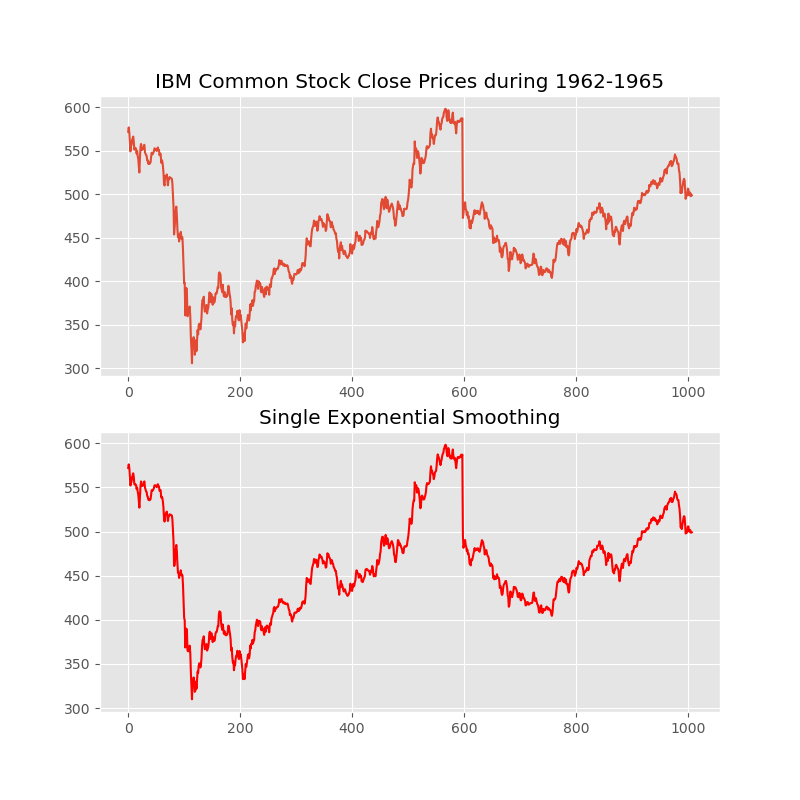

In [10]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax)
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['SES'].plot(ax=ax, color='r')
ax.set_title('Single Exponential Smoothing')
# plt.savefig('plots/ch2/B07887_02_14.png', format='png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


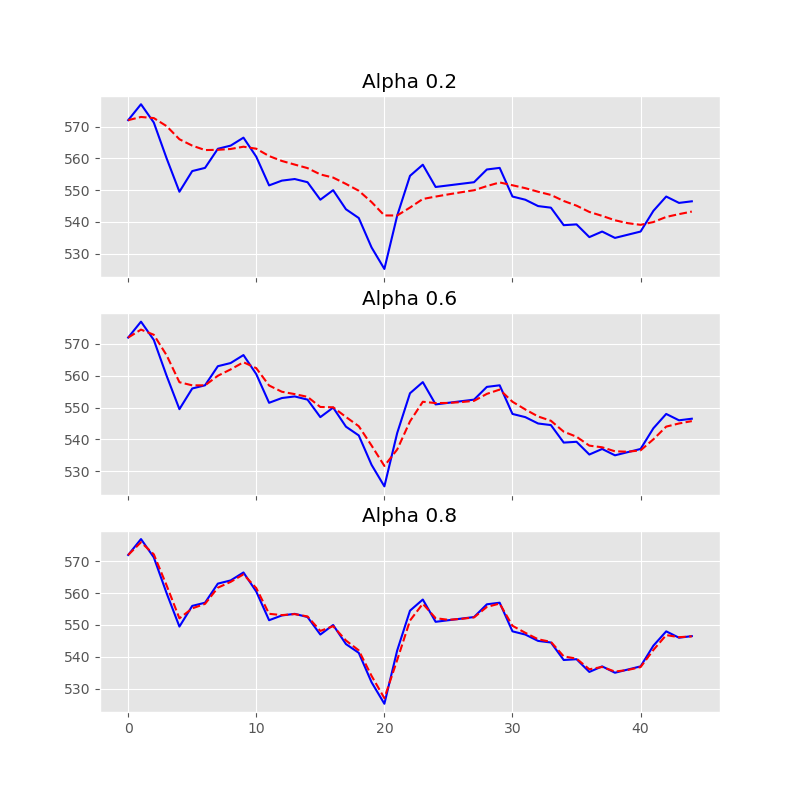

In [12]:
# Plot the forecasted values using multiple alpha values
#Calculate the moving averages using 'rolling' and 'mean' functions
ibm_df['SES2'] = time_series.exp_smoothing(ibm_df['Close_Price'],alpha=0.2,types='single')
ibm_df['SES5'] = time_series.exp_smoothing(ibm_df['Close_Price'],alpha=0.5,types='single')
ibm_df['SES8'] = time_series.exp_smoothing(ibm_df['Close_Price'],alpha=0.8,types='single')

# Plot the curves
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(8,8)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES5'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')
# plt.savefig('plots/ch2/B07887_02_15.png', format='png', dpi=300)
plt.show()


<IPython.core.display.Javascript object>


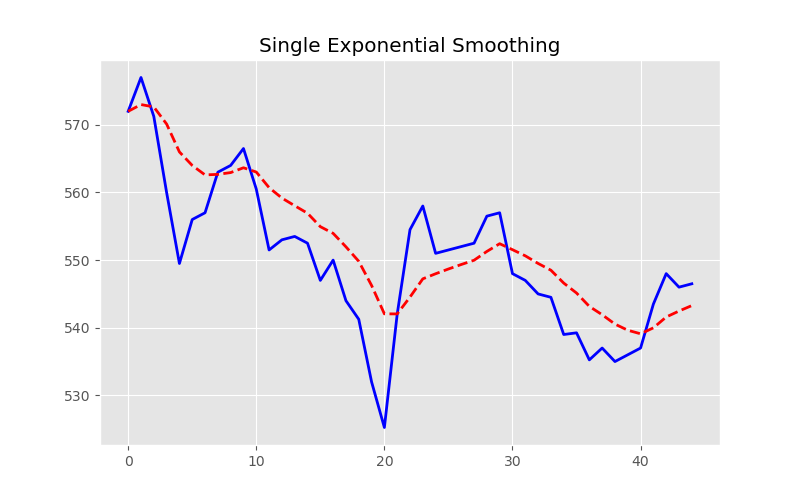

In [22]:
res = time_series.exp_smoothing(ibm_df.iloc[:45],'Close_Price',
                                alpha=0.2,types='single',is_plot=True)

# MSE

In [14]:
mse = 0
for i in range (len(ibm_df['SES5'])-2):
    mse = mse + (ibm_df['Close_Price'][i] - ibm_df['SES5'][i])**2
print(mse/(float(len(ibm_df['SES5'])-2)))

14.744823156181766


In [15]:
mas = 0
for i in range (len(ibm_df['SES5'])-2):
    mas = mas + abs(ibm_df['Close_Price'][i] - ibm_df['SES5'][i])
print(mas/(float(len(ibm_df['SES5'])-2)))

2.414970568170005
